# Lyft Baywheels Bike Visualizations

#### Data Source: https://s3.amazonaws.com/baywheels-data/index.html

Problem Statement: What types of usage patterns exist within bikeshare bike rental programs?

### Imports & Loading Data

In [1]:
import pandas as pd
import numpy as np
import os
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

tqdm.pandas(mininterval=5.,maxinterval=20.)

sns.set_style('darkgrid')
sns.color_palette('deep')
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes


In [2]:
# Get CSV files list from folder
#July 2020 - June 2022
# path = '../Data'
# csv_files = glob.glob(path + "/*.csv")
# df_raw = pd.concat(map(pd.read_csv, glob.glob(path + "/*.csv")))

#Importing of only one CSV in file
csv = '../Data/202206-baywheels-tripdata.csv'
df_raw = pd.read_csv(csv)

df_raw.shape

(255956, 13)

In [3]:
#Preview the data
df_raw.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EC4C14A0ED6C6FAC,classic_bike,2022-06-17 14:20:13,2022-06-17 14:26:51,Bushrod Park,OK-B2,Rockridge BART Station,OK-B4,37.846516,-122.265304,37.844279,-122.251900,casual
1,5DC4C8A10AB1F13D,classic_bike,2022-06-20 16:59:25,2022-06-20 17:17:29,Jackson St at 11th St,OK-L7,Grand Ave at Perkins St,OK-I8,37.800002,-122.266438,37.808894,-122.256460,member
2,4ED2D90CFAFDB497,electric_bike,2022-06-27 09:43:00,2022-06-27 09:58:06,34th Ave at Balboa St,SF-J5,Post St at Divisadero St,SF-G18,37.775726,-122.494084,37.784419,-122.439361,member
3,A880198F4A9E82D0,classic_bike,2022-06-08 11:15:24,2022-06-08 11:26:20,Market St at 10th St,SF-J23-1,Townsend St at 5th St,SF-K28,37.776619,-122.417385,37.775235,-122.397437,member
4,F57A609C861641A9,electric_bike,2022-06-14 14:20:47,2022-06-14 14:36:00,34th Ave at Balboa St,SF-J5,Page St at Masonic Ave,SF-K16,37.775627,-122.494111,37.771153,-122.445201,member


In [4]:
#Make a copy of data before modifying
df = df_raw.copy()

In [5]:
#Making changes to the time data in the df
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['trip_duration'] = df['ended_at'] - df['started_at']
df['trip_duration_min'] = (df['trip_duration'].dt.seconds)/60
df['ride_month'] = df['started_at'].dt.strftime('%b')
df['ride_hour'] = df['started_at'].dt.hour
df['ride_day'] = df['started_at'].dt.dayofweek
df['ride_day_num'] = df['ride_day']
df['ride_day'] = df.ride_day.replace({0: 'Monday', 
                                      1: 'Tuesday',
                                      2: 'Wednesday',
                                      3: 'Thursday',
                                      4: 'Friday',
                                      5: 'Saturday',
                                      6: 'Sunday'})

In [6]:
df.info()

#There appears to be some missing values related to start_station & end_station location details. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255956 entries, 0 to 255955
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   ride_id             255956 non-null  object         
 1   rideable_type       255956 non-null  object         
 2   started_at          255956 non-null  datetime64[ns] 
 3   ended_at            255956 non-null  datetime64[ns] 
 4   start_station_name  218161 non-null  object         
 5   start_station_id    218161 non-null  object         
 6   end_station_name    213095 non-null  object         
 7   end_station_id      213095 non-null  object         
 8   start_lat           255956 non-null  float64        
 9   start_lng           255956 non-null  float64        
 10  end_lat             255717 non-null  float64        
 11  end_lng             255717 non-null  float64        
 12  member_casual       255956 non-null  object         
 13  trip_duration 

In [7]:
#Checking for any duplicated values
df[df.duplicated()]

#No duplicate values found

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,trip_duration_min,ride_month,ride_hour,ride_day,ride_day_num


In [8]:
#Reviewing data after inclusion of additonal time columns
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,trip_duration_min,ride_month,ride_hour,ride_day,ride_day_num
0,EC4C14A0ED6C6FAC,classic_bike,2022-06-17 14:20:13,2022-06-17 14:26:51,Bushrod Park,OK-B2,Rockridge BART Station,OK-B4,37.846516,-122.265304,37.844279,-122.251900,casual,0 days 00:06:38,6.633333,Jun,14,Friday,4
1,5DC4C8A10AB1F13D,classic_bike,2022-06-20 16:59:25,2022-06-20 17:17:29,Jackson St at 11th St,OK-L7,Grand Ave at Perkins St,OK-I8,37.800002,-122.266438,37.808894,-122.256460,member,0 days 00:18:04,18.066667,Jun,16,Monday,0
2,4ED2D90CFAFDB497,electric_bike,2022-06-27 09:43:00,2022-06-27 09:58:06,34th Ave at Balboa St,SF-J5,Post St at Divisadero St,SF-G18,37.775726,-122.494084,37.784419,-122.439361,member,0 days 00:15:06,15.100000,Jun,9,Monday,0
3,A880198F4A9E82D0,classic_bike,2022-06-08 11:15:24,2022-06-08 11:26:20,Market St at 10th St,SF-J23-1,Townsend St at 5th St,SF-K28,37.776619,-122.417385,37.775235,-122.397437,member,0 days 00:10:56,10.933333,Jun,11,Wednesday,2
4,F57A609C861641A9,electric_bike,2022-06-14 14:20:47,2022-06-14 14:36:00,34th Ave at Balboa St,SF-J5,Page St at Masonic Ave,SF-K16,37.775627,-122.494111,37.771153,-122.445201,member,0 days 00:15:13,15.216667,Jun,14,Tuesday,1


In [9]:
#Previewing distribution of bike types
df.rideable_type.value_counts()

#It appears that there are nearly twice as many electric bike rides.
#BikeID's would be needed to determine if this is due to supply of electric bikes, selection bias, or both.

electric_bike    167441
classic_bike      88461
docked_bike          54
Name: rideable_type, dtype: int64

In [10]:
#Previewing distribution of membership types
df['member_casual'].value_counts()

#There are about 12% more member rides than casual rides.
#UserID's would be needed to determine the breakdown between number of members and number of casual riders.

member    135955
casual    120001
Name: member_casual, dtype: int64

In [11]:
#Review of trip duration summary
df['trip_duration_min'].describe()

#Across all rides, the average ride time is just under 15 min. 
#The IQR is 6 - 16.6 min.

count    255956.000000
mean         14.810202
std          29.535482
min           0.000000
25%           6.083333
50%          10.250000
75%          16.600000
max        1438.450000
Name: trip_duration_min, dtype: float64

In [12]:
member_df = df[df['member_casual'] == 'member']
casual_df = df[df['member_casual'] == 'casual']

print("Average Member Ride Time in minutes: " + str(member_df['trip_duration_min'].mean()))
print("Max Member Ride Time in minutes: " + str(member_df['trip_duration_min'].max()))
print("Min Member Ride Time in minutes: " + str(member_df['trip_duration_min'].min()))

print('\n')

print("Average Casual Ride Time in minutes: " + str(casual_df['trip_duration_min'].mean()))
print("Max Casual Ride Time in minutes: " + str(casual_df['trip_duration_min'].max()))
print("Min Casual Ride Time in minutes: " + str(casual_df['trip_duration_min'].min()))

#It looks like members take shorter rides, on average.

Average Member Ride Time in minutes: 11.604719453740989
Max Member Ride Time in minutes: 1438.45
Min Member Ride Time in minutes: 0.0


Average Casual Ride Time in minutes: 18.441849512364957
Max Casual Ride Time in minutes: 1430.45
Min Casual Ride Time in minutes: 0.0


In [13]:
#Ride breakdown by month
#Relevant when loading more data -- removed for run time efficiencies

df.ride_month.value_counts()

#Future exploration can evaluate ride behaviors by month.

Jun    255956
Name: ride_month, dtype: int64

In [14]:
#Review of distribution of rides by day of week
#Surprisingly, the services are most popular mid-week
df.ride_day.value_counts()

#Most rides occur on Wednesdays and Thursdays.
#Is there a particular time that rides are popular?

Thursday     43130
Wednesday    41394
Saturday     36475
Friday       35358
Monday       34895
Tuesday      34365
Sunday       30339
Name: ride_day, dtype: int64

In [15]:
num_start_station_names = df.start_station_name.nunique()
num_end_station_names = df.end_station_name.nunique()
num_start_station_id = df.start_station_id.nunique()
num_end_station_id = df.end_station_id.nunique()

print(str(num_start_station_names) + " unique starting stations.")
print(str(num_end_station_names) + " unique ending stations.")

#There are roughly equivalent starting and ending areas.

497 unique starting stations.
496 unique ending stations.


In [16]:
print(num_start_station_names == num_start_station_id)
print(num_end_station_names == num_end_station_id)

df = df.drop(columns=(['start_station_id', 'end_station_id']))

#Dropping station_id columns given that they appear to have a 1:1 relationship with station_names

True
True


In [17]:
start_stations = df.start_station_name.value_counts()
start_stations

#It looks like the top five starting stations are Market St, Powell St, & Townsend St

Market St at 10th St                              3039
Market St at Steuart St                           2835
Powell St BART Station (Market St at 4th St)      2437
Powell St BART Station (Market St at 5th St)      2201
San Francisco Caltrain (Townsend St at 4th St)    2009
                                                  ... 
Farnam St at Fruitvale Ave                           5
Willow St at Vine St                                 5
Minnesota St Depot                                   4
SF Depot-2 (Minnesota St Outbound)                   3
Brockhurst St at San Pablo Ave                       1
Name: start_station_name, Length: 497, dtype: int64

In [18]:
end_stations = df.end_station_name.value_counts()
end_stations

#It looks like the top five ending stations are similar to starting stations.
#Market St, Powell St, & now North Point St

Market St at 10th St                            3105
Market St at Steuart St                         3035
Powell St BART Station (Market St at 4th St)    2642
Powell St BART Station (Market St at 5th St)    2272
North Point St at Polk St                       2054
                                                ... 
1st St at Younger Ave                              7
Bond St at High St                                 6
San Pedro St at Hedding St                         5
Brockhurst St at San Pablo Ave                     3
Minnesota St Depot                                 1
Name: end_station_name, Length: 496, dtype: int64

In [19]:
# Store clean data to file
df.to_csv('../data/cleaned_bike_data.csv', encoding='utf-8', index=False)

### Visualization

In [20]:
#df =  df.iloc[:100,:]
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,trip_duration_min,ride_month,ride_hour,ride_day,ride_day_num
0,EC4C14A0ED6C6FAC,classic_bike,2022-06-17 14:20:13,2022-06-17 14:26:51,Bushrod Park,Rockridge BART Station,37.846516,-122.265304,37.844279,-122.251900,casual,0 days 00:06:38,6.633333,Jun,14,Friday,4
1,5DC4C8A10AB1F13D,classic_bike,2022-06-20 16:59:25,2022-06-20 17:17:29,Jackson St at 11th St,Grand Ave at Perkins St,37.800002,-122.266438,37.808894,-122.256460,member,0 days 00:18:04,18.066667,Jun,16,Monday,0
2,4ED2D90CFAFDB497,electric_bike,2022-06-27 09:43:00,2022-06-27 09:58:06,34th Ave at Balboa St,Post St at Divisadero St,37.775726,-122.494084,37.784419,-122.439361,member,0 days 00:15:06,15.100000,Jun,9,Monday,0
3,A880198F4A9E82D0,classic_bike,2022-06-08 11:15:24,2022-06-08 11:26:20,Market St at 10th St,Townsend St at 5th St,37.776619,-122.417385,37.775235,-122.397437,member,0 days 00:10:56,10.933333,Jun,11,Wednesday,2
4,F57A609C861641A9,electric_bike,2022-06-14 14:20:47,2022-06-14 14:36:00,34th Ave at Balboa St,Page St at Masonic Ave,37.775627,-122.494111,37.771153,-122.445201,member,0 days 00:15:13,15.216667,Jun,14,Tuesday,1


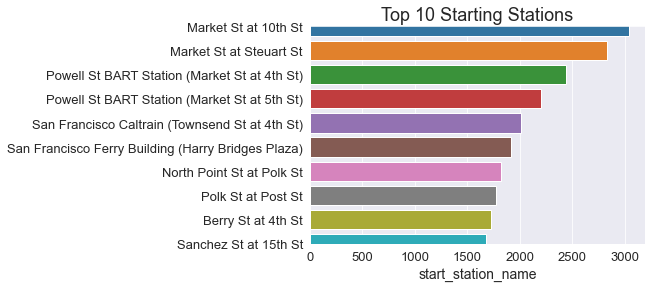

In [21]:
limit = 9
sns.barplot(data=df, y=start_stations.index, x=start_stations, palette='tab10')
plt.ylim(limit, 0)
#plt.xticks(rotation=90)
plt.title('Top 10 Starting Stations')
plt.show()

#A Visualization of the top 10 starting stations

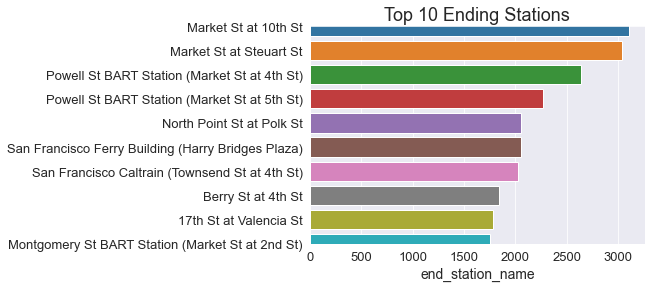

In [22]:
limit = 9
sns.barplot(data=df, y=end_stations.index, x=end_stations, palette='tab10')
plt.ylim(limit, 0)
#plt.xticks(rotation=90)
plt.title('Top 10 Ending Stations')
plt.show()

#A Visualization of the top 10 ending stations

<AxesSubplot:xlabel='trip_duration_min', ylabel='Count'>

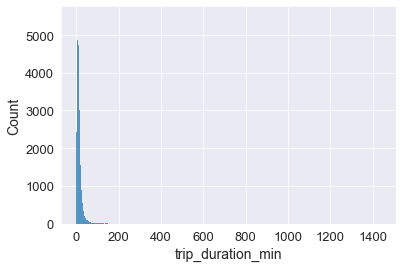

In [23]:
#Histogram of ride durations. Trips are concentrated below 200 min -- best for a log transformation
sns.histplot(data=df, x='trip_duration_min')

/Users/msmith/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


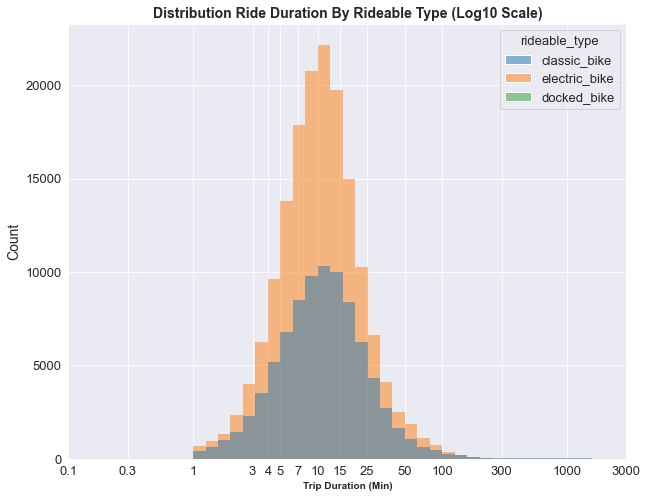

In [24]:
#Log Transformation and plotting of Ride Time, broken out by bike type.
log_data = np.log10(df['trip_duration_min'])

log_bin_size = 0.1
log_bins = 10 ** np.arange(0, np.log10(df['trip_duration_min'].max())+log_bin_size, log_bin_size)
tick_locs = [0.1,0.3,1,3,4,5,7,10,15,25,50, 100, 300, 1000, 3000]
tick_labels = ['{}'.format(v) for v in tick_locs]

plt.figure(figsize = [10,8])
sns.histplot(data = df, x='trip_duration_min', hue='rideable_type', bins=log_bins)
plt.xscale('log')
plt.xticks(tick_locs, tick_labels)
plt.title('Distribution Ride Duration by Rideable Type (Log10 Scale)'.title(),fontsize = 14, weight = 'bold')
plt.xlabel('Trip Duration (Min)'.title(),fontsize = 10, weight = 'bold')
plt.show()


#Visualization supports that ride time is generally between 6-16 minutes for both electric bike & classic bike types

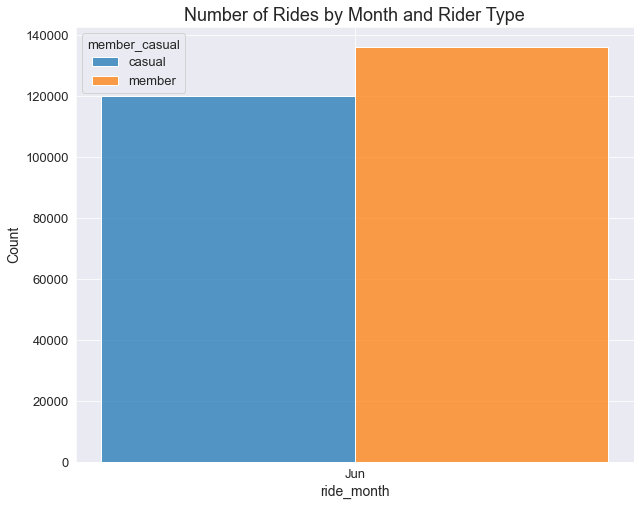

In [25]:
plt.figure(figsize = [10,8])
sns.histplot(data=df, x='ride_month', hue='member_casual', multiple='dodge')
plt.title('Number of Rides by Month and Rider Type')
plt.show()

#As stated before, number of member rides outpace casual rides. Though it is unclear what the count ratio of members:casual riders is.

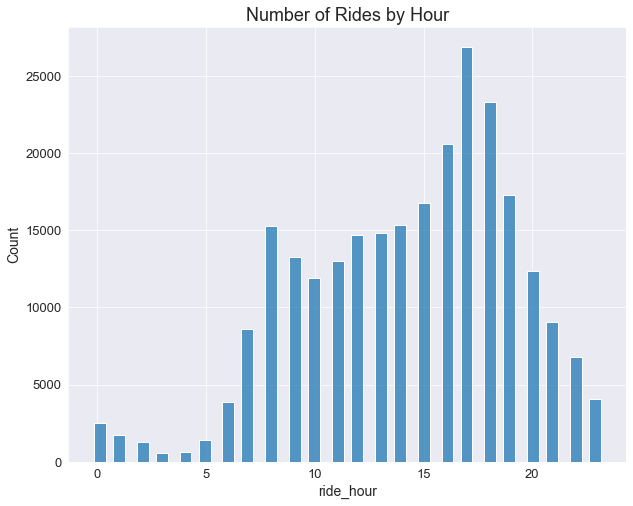

In [26]:
plt.figure(figsize = [10,8])
sns.histplot(data=df, x="ride_hour", shrink = 2.5)
plt.title('Number of Rides by Hour')
plt.show()

#There are two peaks in ride times, 8AM and 5PM. 
#This seems to indicate that bikeshare programs also experience a "rush hour" at the beginning and end of the workday.

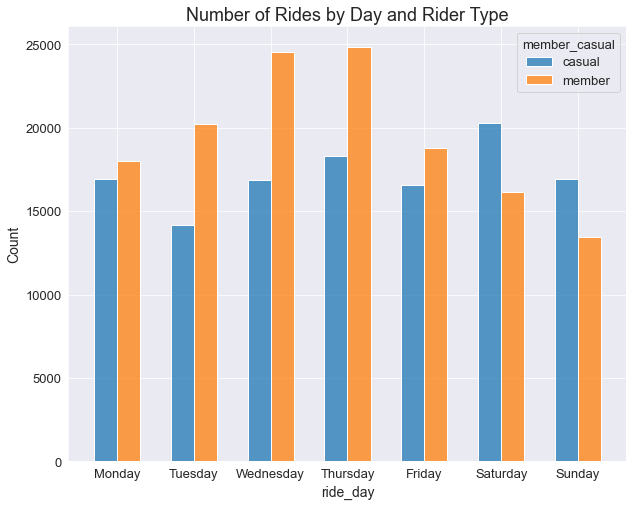

In [27]:
df['ride_day'] = pd.Categorical(df['ride_day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plt.figure(figsize = [10,8])
sns.histplot(data=df, x="ride_day", hue="member_casual", multiple="dodge", shrink = .6)
plt.title('Number of Rides by Day and Rider Type')
plt.show()

#

### Summary

#### Findings for ride data during the month of June 2022:
1) There appear to be slightly more Member Rides than Casual Rides
2) Overall usage peaks at 8AM and 5PM
3) Daily number of member rides increase from Monday to Thursday and decrease from Friday to Sunday
4) Daily number of casual rides show more stability during the week with a notable increase on Saturdays

#### Ideas for further exploration:
1) Incorporate BikeID and RiderID features to determine proportional count of bike types and rider types
2) Expand dataset to include more months, to allow analysis of usage over a longer time horizon
3) Overlay map of area and apply latitude & longitude coordinates to visualize starting & stopping location within the dataset.
4) Obtain height (Z coordinate) data from Lat & Lng to review route choice based upon elevations. Insight derived could be applied to future bike hub site placements